In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# plot()の出力をSVGにする
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# データのロード
df = pd.read_csv('./data/qerr_d_out.tsv', sep='\t')

In [2]:
groupNonNorm = df.query('not norm').set_index('d').groupby('Q-type')
groupNorm = df.query('norm').set_index('d').groupby('Q-type')

以下の2つのプロットにおいて、Quantizer間のV-errとT-errの大小関係が逆転していることに着目する。
V-errが学習に使ってないベクトルの誤差、T-errは学習に使ったベクトルの誤差である。
V-errはPQが最も小さく続いてRQ、LSQと大きくなっていくが、T-errにおいては逆転してLSQが最も小さくRQ、PQと大きくなっていく。
つまりLSQやRQはPQに比べて学習に使ったベクトルの誤差が少ない。

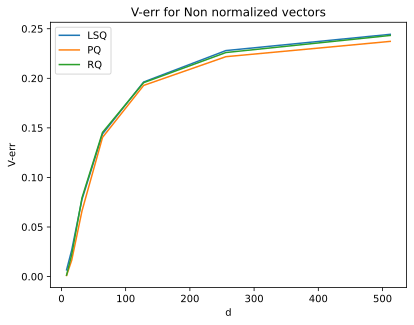

In [3]:
groupNonNorm['V-err'].plot(title='V-err for Non normalized vectors', ylabel='V-err', legend=True); None

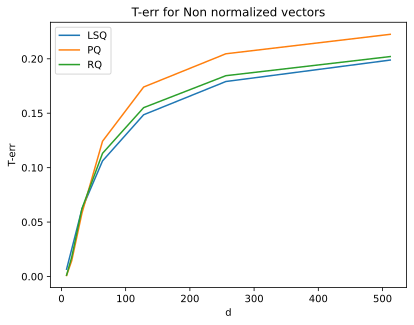

In [4]:
groupNonNorm['T-err'].plot(title='T-err for Non normalized vectors', ylabel='T-err', legend=True); None

同様の傾向は単位ベクトルでも同様である。

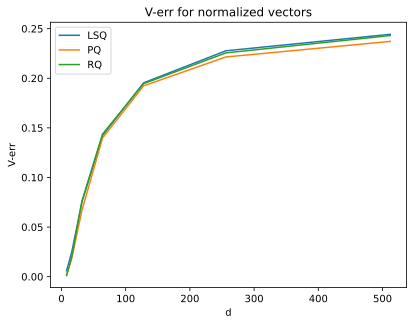

In [5]:
groupNorm['V-err'].plot(title='V-err for normalized vectors', ylabel='V-err', legend=True); None

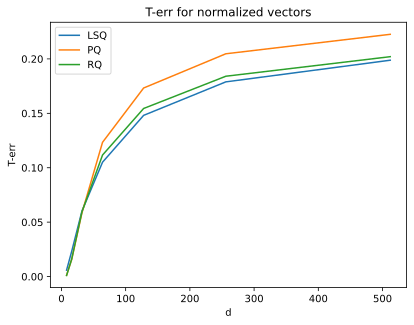

In [6]:
groupNorm['T-err'].plot(title='T-err for normalized vectors', ylabel='T-err', legend=True); None

以下の6つのプロットは、各QuantizerのV-errとT-errを直接比較している。
どのQuantizerにおいてもT-errはV-errよりも小さくなるが、LSQやRQにおける減少幅がPQよりも大きいことが見て取れる。
これは上記の結果に合致する。

In [7]:
def plotVTerrs(qtype, norm):
    df.query('`Q-type`==@qtype & norm==@norm').set_index('d')[['V-err', 'T-err']].plot(title=f"{qtype}, norm={norm}")

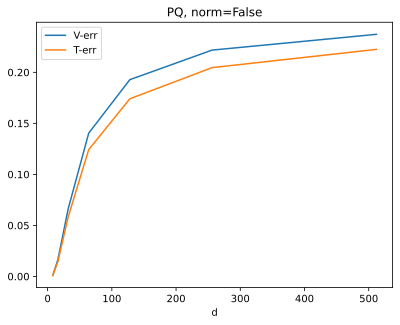

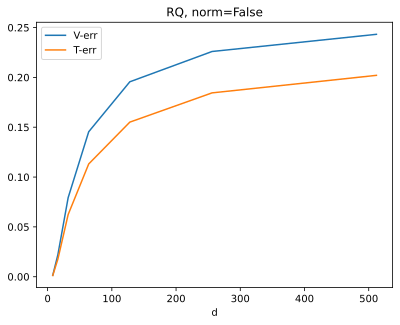

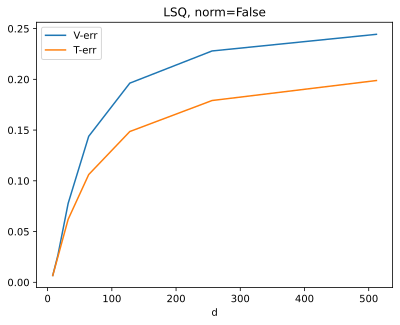

In [8]:
plotVTerrs('PQ', False)
plotVTerrs('RQ', False)
plotVTerrs('LSQ', False)

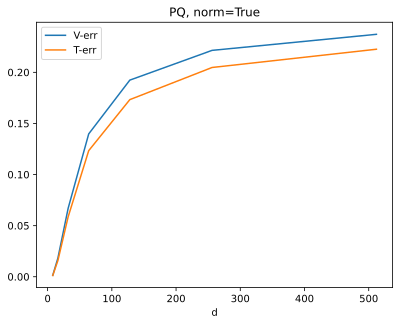

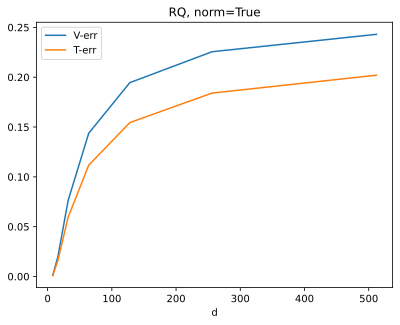

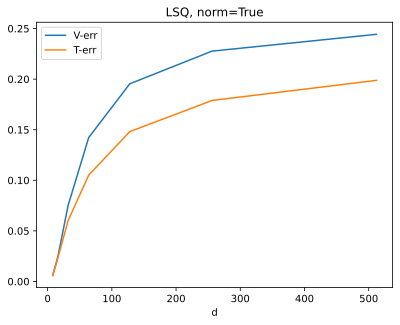

In [9]:
plotVTerrs('PQ', True)
plotVTerrs('RQ', True)
plotVTerrs('LSQ', True)